# CSE 5243 - Introduction to Data Mining
## Exploratory Data Analysis
- Student Name: Jose Benitez

Template Version V1.
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

hello world


In [2]:
df = pd.read_excel('ALTERED owid-covid-data.xlsx',sheet_name = 'ALTERED owid-covid-data')
df.head()


,RECID,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,NEW_CASE_TREND
0,1,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
1,2,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
2,3,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
3,4,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN
4,5,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN


***
# Section: 1 - Business Understanding
- Write a paragraph providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

***
- The data came from "Our World in Data" where it provided us with a COVID-19 dataset. Each row represents a date reported by a location and their information regarding how many covid related issues they had. The data was reported ECDC as they were incharge of collecting the information and harmaning the data from around the world. The data as stated in their website is free to be used by anyone. With that being said, the data is most likely to be used by researchers or even news broadcaster. An example of this can be seen in New York times as they have a world map where they describe the rising cases of Covid around the world. There are various questions that users will be able to answer from analzying the data. For example is there any correlation between variables? Is there data that might be getting gathered that is of no benefit? And what locations are suffereing the most/least and what are they are doing that is helping(testing, having facilities that help)?
***

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class.
***

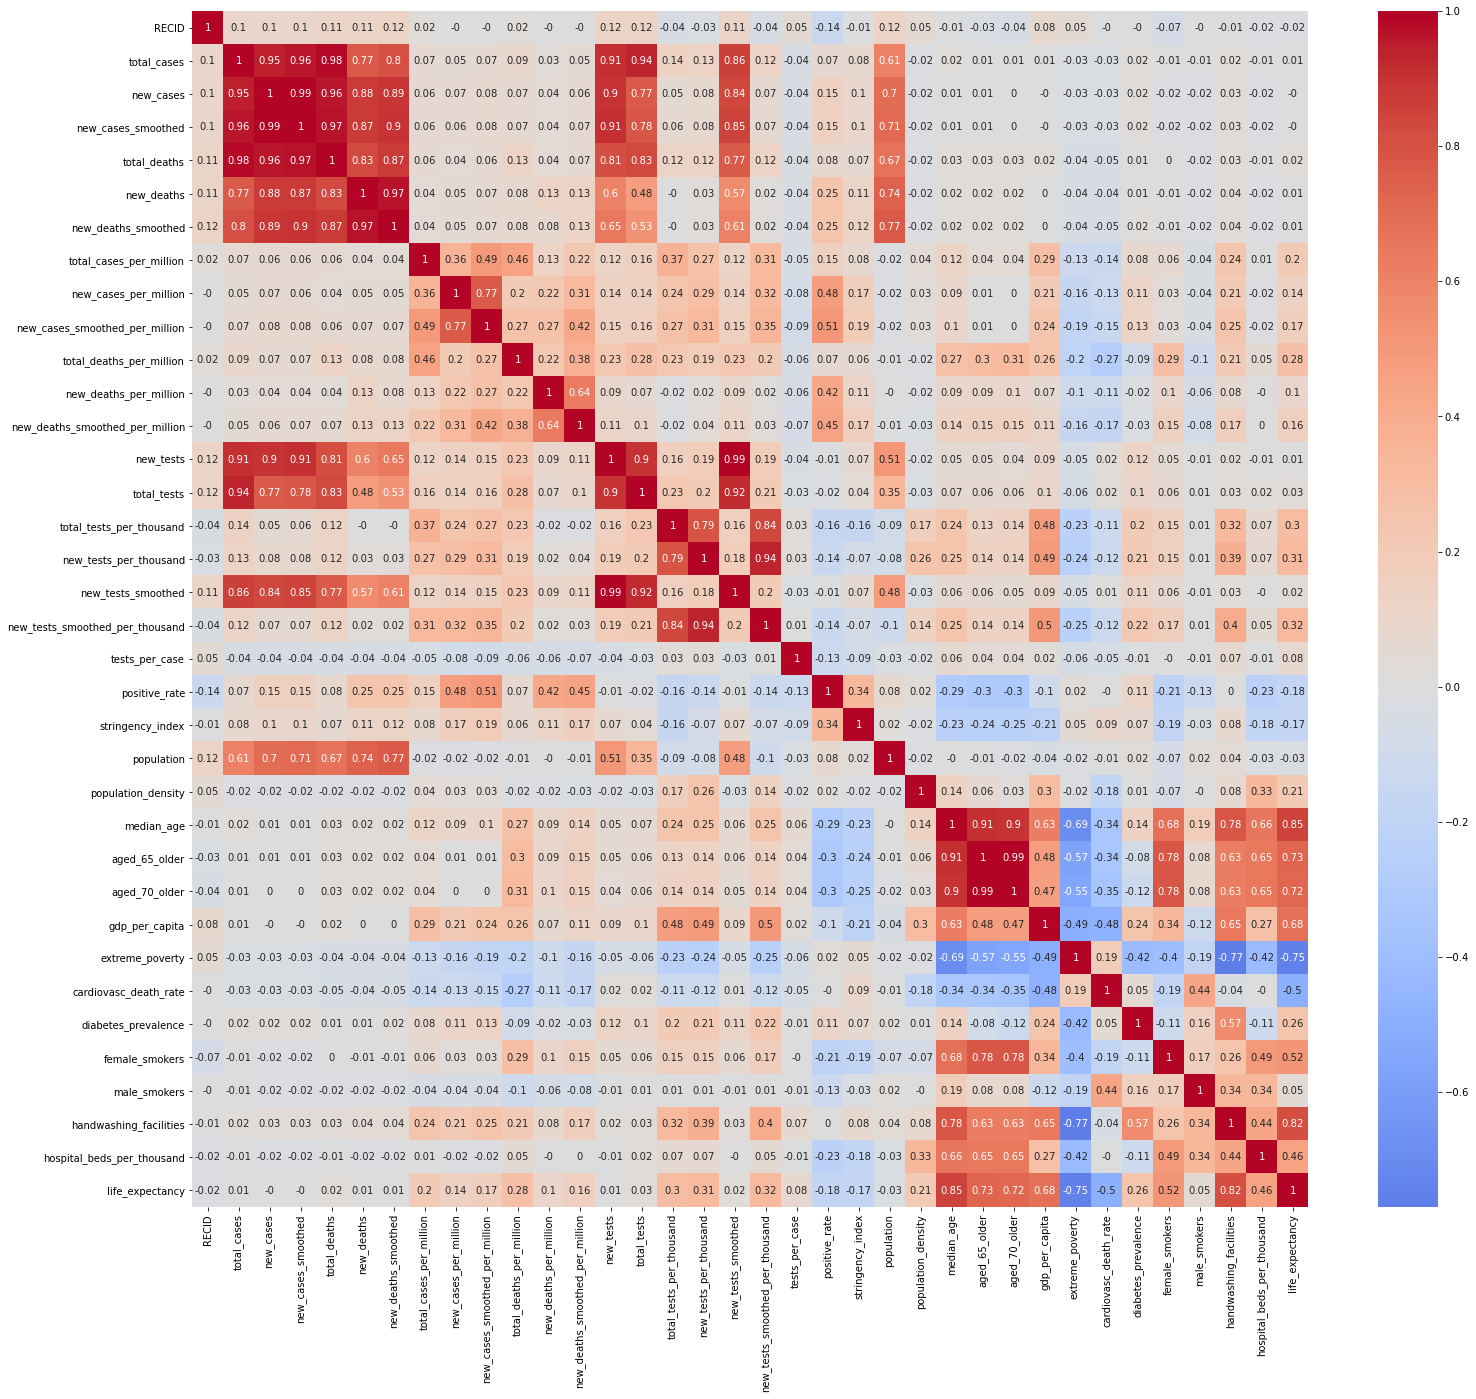

In [3]:
correlation_matrix = df.corr().round(2) #rounds to 2 decimal places
plt.figure(figsize=(25,22))#ask what this does
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

***
- From the model above we can see how bivariate models are presented. I went ahead and did a table to find out if there is any correlation between any two variables. This will be valueable information since that means we can most likely get rid of that variable if the correlation is positive. If it is negative that just means that as the values for a variable goes up, the inverse happens for the other variable. From the graph we can see that there is a .99 correlation between new_cases_smoothed and total_cases. The same case happens for the variables aged_70_older and aged_65_older. The list goes on and on for two variables whose correlation is higher than .9. 
    - List of some variables higher than .9
        - aged_70_older and median_age
        - new_tests and total_cases
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.
***

In [4]:
df.dtypes

RECID                                       int64
iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64


***
- The column above describes the columns and each of their data types. The follow list identifies what each column means (I didn't identify all the columns since most of them seem to be self explanatory. 
    - iso_code - is an identification number for each data row in the dataframe which assists to identify it
    - diabetes_prevalence - number of people with diabetes
    - new_case_treads - whether the new cases are staying consistent or growing or declining.
    - new_tests_smoothed - New tests for COVID-19 (7-day smoothed), for countries that don't report daily
    - new_tests_smoothed_per_thousand - New tests for COVID-19 (7-day smoothed) per 1,000 people
    - gdp_per_capita - Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
    - population_density -Number of people divided by land area, measured in square kilometers
***

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [5]:
df.describe()

,RECID,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,42649.000000,4.207400e+04,41884.000000,41101.000000,42074.000000,41884.000000,41101.000000,41820.000000,41820.000000,41037.000000,...,37869.000000,37586.000000,25098.000000,38079.000000,39410.000000,29942.000000,29567.000000,17731.000000,34461.000000,41867.000000
mean,21325.000000,8.458119e+04,1318.411231,1307.672213,3638.575843,42.884467,42.878489,1644.360229,22.348409,22.065608,...,5.891006,21072.662978,11.929194,251.049336,8.046783,10.855732,32.639923,52.705054,3.120487,74.084896
std,12311.850152,8.757564e+05,12049.462316,11875.367143,34029.492765,364.814844,354.179954,4394.025412,70.244317,53.659834,...,4.326652,20517.439597,19.076276,117.718404,4.138276,10.485089,13.400078,31.554879,2.534914,7.358198
min,1.000000,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,10663.000000,4.300000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,20.153250,0.000000,0.107000,...,2.142000,5591.597000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000
50%,21325.000000,8.470000e+02,9.000000,13.143000,15.000000,0.000000,0.143000,250.031000,1.339000,2.649000,...,4.419000,14103.452000,1.800000,237.372000,7.110000,6.434000,31.400000,55.182000,2.500000,75.490000
75%,31987.000000,8.928000e+03,145.000000,151.000000,191.000000,3.000000,2.857000,1614.355500,15.212000,16.861000,...,9.473000,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000
max,42649.000000,2.760941e+07,298039.000000,270541.143000,898087.000000,10491.000000,7456.571000,526397.000000,4944.376000,882.924000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

***
- There are three visualizations that I will be providing. Each one of them is random and of simple interesting to me. The three charts will be over the following
    - A specific location comparing the dates to the number of new cases
    - hospital beds per thousands compared to new cases for a specific location
    - Median age compared to total deaths (To compare if elders were targeted more)
***

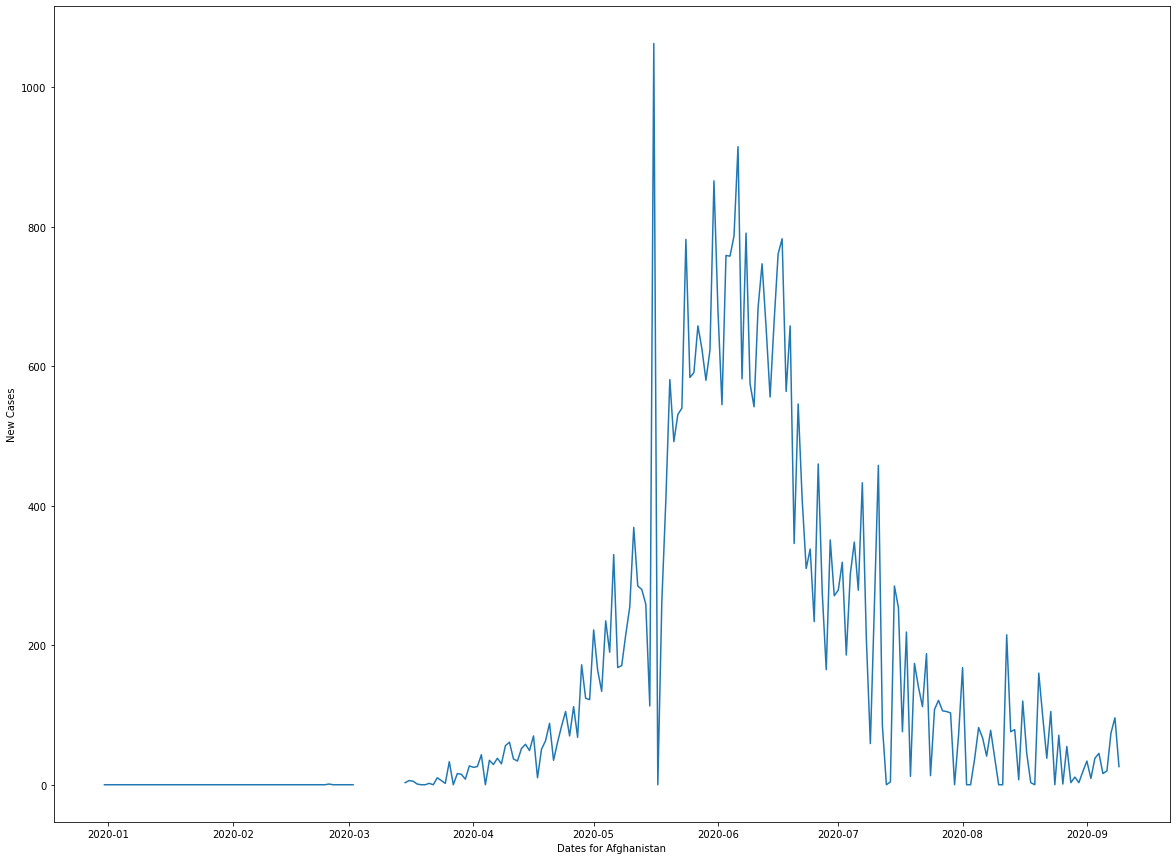

In [6]:
#A specific location comparing the dates to the number of new cases
from datetime import datetime
columns = np.array(df.columns)
array = np.array(df)
dates = []
for date in array[:,4:5]:
    dates.append(date[0].date())
dates = dates[0:253]
new_cases = np.array(array[:,6:7])
plt.figure(figsize=(20, 15))
plt.plot(dates,new_cases[0:253])
plt.ylabel('New Cases')
plt.xlabel('Dates for Afghanistan')
plt.show()

This was significantly great to have a look at. As we can see the rise of new cases compared to the dates that followed. The best thing to that we see from the graph is how great it is that once they hit their peak, they didn't stay there for long.

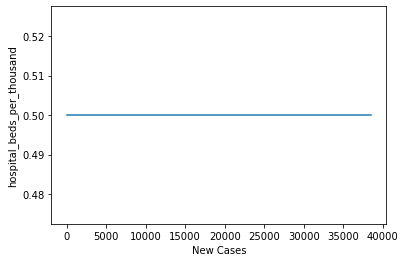

In [7]:
#hospital beds per thousands compared to total cases for a specific location
hospital_beds = np.array(array[:,39:40])
new_cases = np.array(array[:,5:6])
plt.plot(new_cases[0:253],hospital_beds[0:253])
plt.xlabel('New Cases')
plt.ylabel('hospital_beds_per_thousand')
plt.show()

***
- This was a chart that I was completely wrong about. I am not sure why this was the case with Afghanistan. It most definitely made sense that more hospital beds would have been brought in. Yet, with the rise of new cases it didn't. This could have meant that either peole weren't getting the proper care they needed, or that their hospitals had plenty of supplies. 
***

[105, 0, 142, 0]


Text(0.5, 0, 'NEW_CASE_TREND')

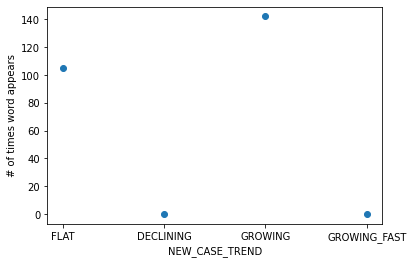

In [8]:
#- Median age compared to total deaths (To compare if elders were targeted more)
class_att =  np.array(df['NEW_CASE_TREND'][0:253])
class_loc = np.array(['FLAT', 'DECLINING', 'GROWING','GROWING_FAST'])

class_rep = [0,0,0,0]
for obj in class_att:
    if obj == 'GROWING':
        class_rep[2] +=1
    elif obj == 'GROWING_FAST':
        class_rep[3] +=1
    elif obj == 'FLAT':
        class_rep[0] +=1
    elif obj == 'DECLINING':
        class_rep[1] +=1

print(class_rep)
plt.plot(class_loc,class_rep,'o')
plt.ylabel('# of times word appears')
plt.xlabel('NEW_CASE_TREND')

I created this graph to see how NEW_CASE_THREND class attribute was being labeled as compared to the number of total cases from the first graph that I plot up above. What I found the most intersting was that the terms GROWING_FAST WAS NEVER used. It would just seem to me that it would have been used from graph one when there is a hugh spike in the the number of cases. So I am not sure how this attribute is measured. 


***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
    -It is always very tough to deal with data that has not been reported. In cn
***

In [9]:
columns =  np.array(df.columns)
missing_data_columns = np.zeros(columns.size)
full_data = np.array(df.isnull())
for index in range(len(full_data)):
    for j in range(42):
        if full_data[index][j] == True:
            missing_data_columns[j] += 1
for i in range(42):
    print(f'Column: {columns[i]} has {missing_data_columns[i]} missing values in data.')

Column: RECID has 0.0 missing values in data.
Column: iso_code has 254.0 missing values in data.
Column: continent has 508.0 missing values in data.
Column: location has 0.0 missing values in data.
Column: date has 0.0 missing values in data.
Column: total_cases has 575.0 missing values in data.
Column: new_cases has 765.0 missing values in data.
Column: new_cases_smoothed has 1548.0 missing values in data.
Column: total_deaths has 575.0 missing values in data.
Column: new_deaths has 765.0 missing values in data.
Column: new_deaths_smoothed has 1548.0 missing values in data.
Column: total_cases_per_million has 829.0 missing values in data.
Column: new_cases_per_million has 829.0 missing values in data.
Column: new_cases_smoothed_per_million has 1612.0 missing values in data.
Column: total_deaths_per_million has 829.0 missing values in data.
Column: new_deaths_per_million has 829.0 missing values in data.
Column: new_deaths_smoothed_per_million has 1612.0 missing values in data.
Column:

***
- The above information shows us the number of missing values per the column. My main believe as to why there is so much missing data for some of the columns is that perhaps that data wasn't seen as important in the beginning of the pandemic. Why do I say this? In the beginning people were all searching to see what age range was being attacked the most. Most people weren't very concern with lets say, whether you were a smoker or Gross domestic product at purchasing power parity. I can see why there is a lot of new_cases_smoothed data that is missing. It could be that most countries were reporting daily that they didn't feel a need to report every 7 days. 
***

In [10]:
#finding duplicates in the column data
dates = []
for date in array[:,4:5]:
    dates.append(str(date[0].date()))
countries = array[:, 3:4]
dates = np.array(dates).reshape(42649,1)
location_dates = np.concatenate((countries, dates), axis=1)

datas_df = pd.DataFrame(data=np.array(location_dates))
index = 0
for i in np.array(datas_df.duplicated()):
    if i == True:
        print(index)
        print(countries[index])
        print(dates[index])
        print("")
    index+=1


296
['Albania']
['2020-04-20']

34164
['Singapore']
['2020-06-02']

34165
['Singapore']
['2020-06-03']

34166
['Singapore']
['2020-06-04']

34183
['Singapore']
['2020-06-20']



For this part, I cheated a little bit since I focused on the highlighted parts in the excel sheet. What I did was created an array for location and dates in order to find out all the duplicated dates. I used the function duplicated(), yet it didn't provide me with enough information. It kept giving me false values where I could see that there was duplicated data. So I chose to go this route and focus on a specific columns. Yet, the code could be change quite quickly to check for any column(s).

- THE FOLLOWING DEALS WITH OUTLIERS

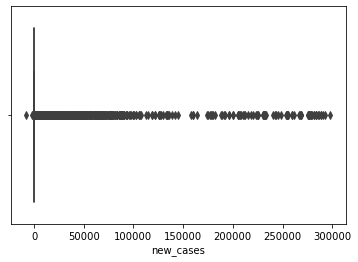

In [11]:
import seaborn as sns
sns.boxplot(x=df['new_cases'])

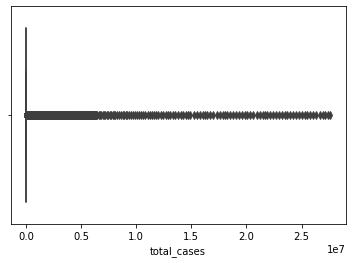

In [12]:
sns.boxplot(x=df['total_cases'])

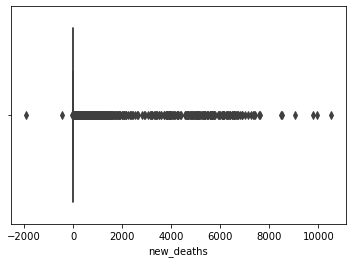

In [13]:
sns.boxplot(x=df['new_deaths'])

The way I would handle this data set is by eliminating any values that is less than zero since there can't be negative deaths.

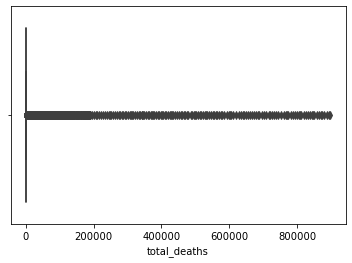

In [14]:
sns.boxplot(x=df['total_deaths'])

No outliers here

Once again I would correct this data set by taking away any negative values and leaving that space as empty

***
## Section: 2.5 - Explore the relationships among the attributes, excluding the class attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

***
- In this section I will be referring back to my correlation heatmap in the beginning of section 2. I will be exploring correlations between 2 or more variables in order to try an understand their relationships. I will focus on variables that seems to have higher correlation and also the ones that seem to not be dependent on each other. I will be focusing on a specific country which in this case will be the United States since they have less data missing
    - First, I want to look at the correlation of +65 and +70 years old in contrast to female smokers
    - 
***

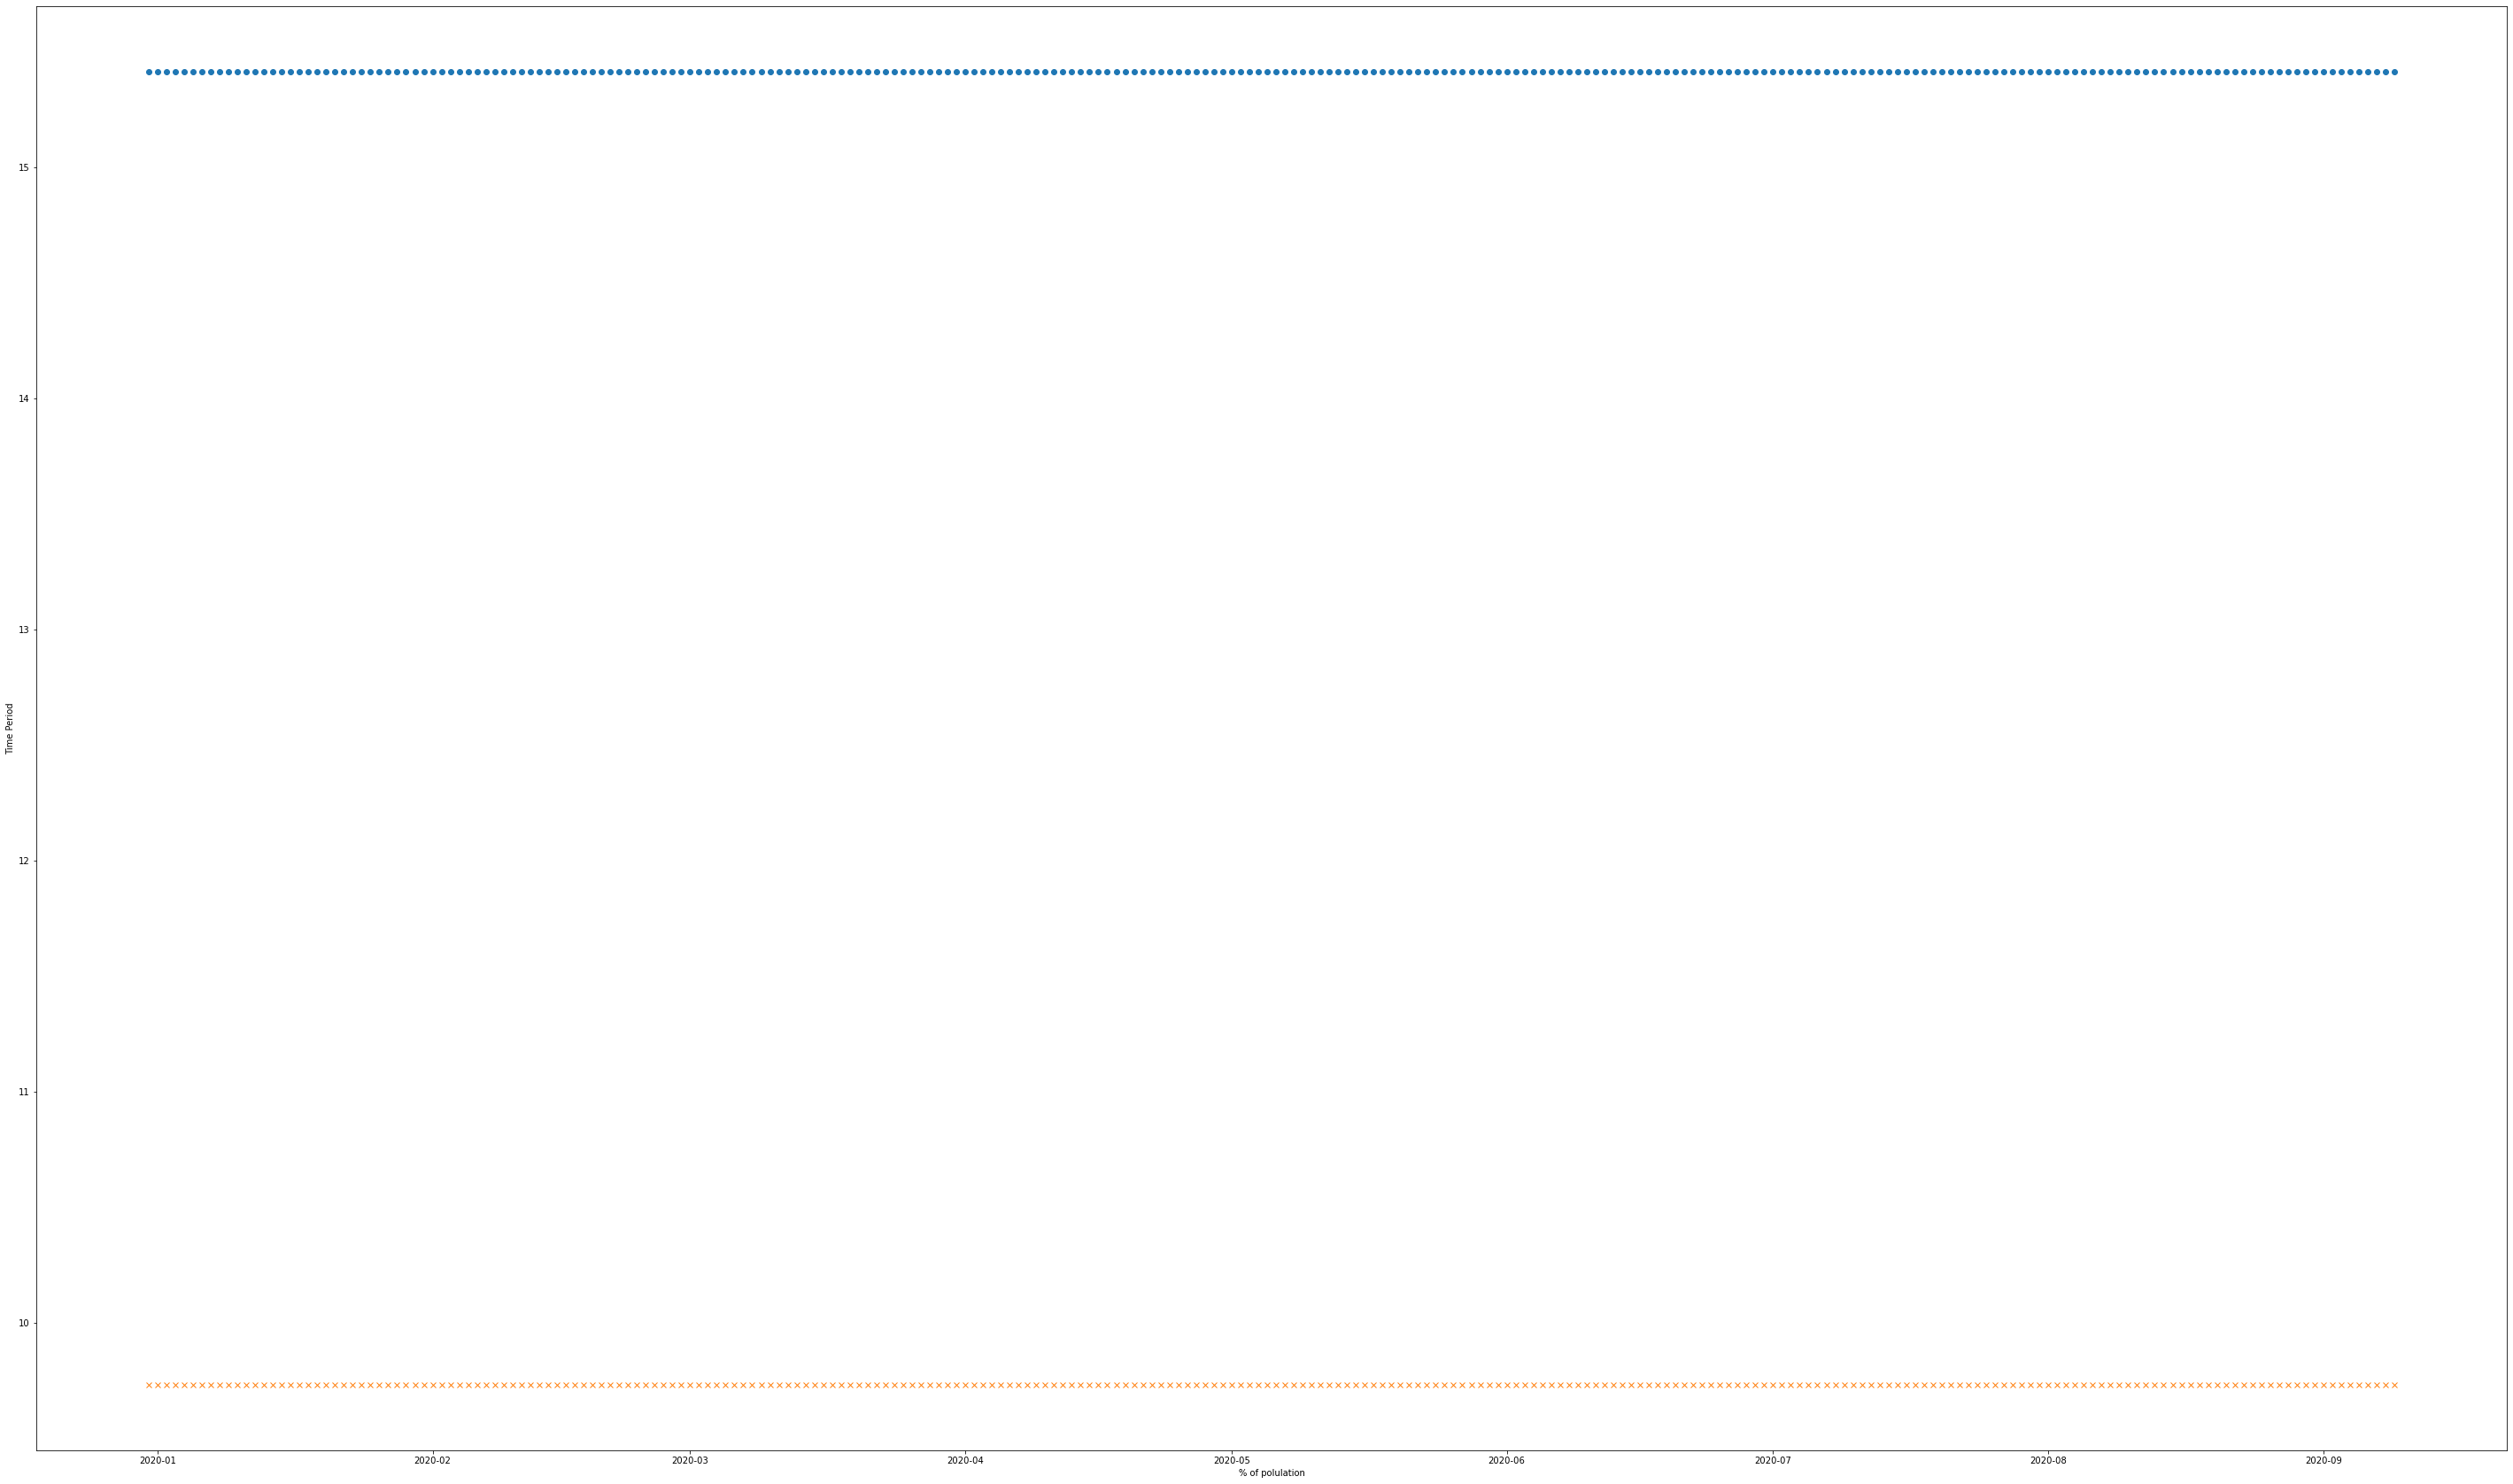

In [15]:
#First, I want to look at the correlation of +65 and +70 years old in contrast to female smokers
from datetime import datetime
array = np.array(df)
dates = []
for date in array[:,4:5]:
    dates.append(date[0].date())

age_65 = np.array(array[:,30:31])[40107:40361]
#print(age_65[40107:40361])
age_70 = np.array(array[:,31:32])[40107:40361]
class_att = np.array(array[:,41:42])[40107:40361]
#female_smoker = np.array(array[:,36:37])[40107:40361]
male_smoker = np.array(array[:,37:38])[40107:40361]
plt.figure(figsize=(50, 30))
plt.plot(dates[40107:40361],age_65,'o')
plt.plot(dates[40107:40361],age_70,'x')
plt.xlabel('% of polulation')
plt.ylabel('Time Period')
plt.show()


From looking at the heatmap I saw that there was a good amount of correlation(.99) between the percentage of population for people over the age of 65 and over the age of 70. Which pretty much means that as one goes up the other goes up. However, I personally feel like the information isn't super helpful in this instance as the data stays consistent so there is really no trend that really describes how one is directly impact by the other. 

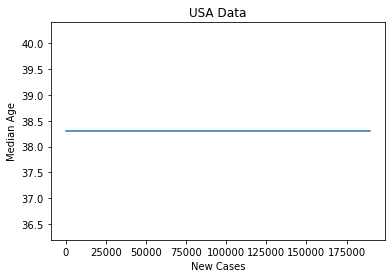

In [16]:
#- Median age compared to total deaths (To compare if elders were targeted more)
median_age = np.array(array[:,29:30])
total_deaths = np.array(array[:,8:9])
plt.plot(total_deaths[40107:40361],median_age[40107:40361])
plt.xlabel('New Cases')
plt.ylabel('Median Age')
plt.title("USA Data")
plt.show()

I found this information very interesting since I personally would have expected the median age to have drop with the rise of new cases. However, it is really good to see that the median age stayed consistent. This most likely means that as soon as it was stated that elderly people were being targeted, they were prioritize to stay safe. 

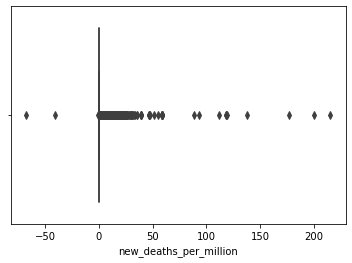

In [17]:
sns.boxplot(x=df['new_deaths_per_million'])

I wanted to make a plot of various columns that shouldn't have any negative values. In this case deaths. I honestly wonder if this is due to human error. Also I wonder how much the correlation would change if all the bad data like such was changed

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier visualizations or create new ones.
***

One of the relationships that I didn't expect to find was that the median age compared to new cases would have stayed the same. I would have thought that the median age would have decline. However, I find that this relationship could be very useful when it comes to possibly gettin rid of an attribute. Just because if the median age stays the same, then maybe it's not of much use. Next, I would like to investigate as to why they created a a column for 65+ years old and one for 70+ years old. I would have personally though that that there would have not been that big of a difference in terms of their correlation. It just made sense that your would combine the two columns. Secondly, I was really surprised by the number of negative values that appear for data that shouldn't be negative. I believe that this is definetly affecting the correlation of the data. In section 3 I will do another correlation map to see stuff changes when correcting a lot of the data.

***
# Section: 3 - Data Processing
- Based on the insights gleaned in the data understanding phase, determine what type of processing that you would like to do to create a final dataset to be used for future modeling.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python data frame) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

There is a list of things that I would do to change this data. The first thing to get rid of any negative number. Also, I will be removing any columns that I just find as not necessary 

In [18]:
update_df = df.drop(columns=['RECID', 'NEW_CASE_TREND','aged_70_older'])
data = np.array(update_df)

***
## Section: 3.1 - What attributes do you decide to keep or remove? Please justify.
***

There were two columns that I decide to get rid off. They were the two columns that were added. And the age over 70 columns. You might wonder why I got rid of these two columns that the professor added. Well, I felt that RECID is only used as a columns to identify a certain row. However, I felt that you could just concatenate a column to the dataframe. Also, I felt like there was no true way to calculate NEW_CASE_TREND. It would just be base on opinion and anyone could choose a different interpretation. And finally, I felt that aged_70_older didn't add any new interpretation. 

***
## Section: 3.2 - Did you decide to implement any attribute transformations? If so, why?
***

I didn't decide to implement any attribute. I was considering to transform/combine some attributes. Like deaths with death smoothed. Which I felt like it made sense since there is a lot of missing values for death smoothed. Yet, I can see how some countries/locations would only be able to report certain data every 7 days.

***
## Section: 3.3 - Did you decide to create any new features? If so, why?
***

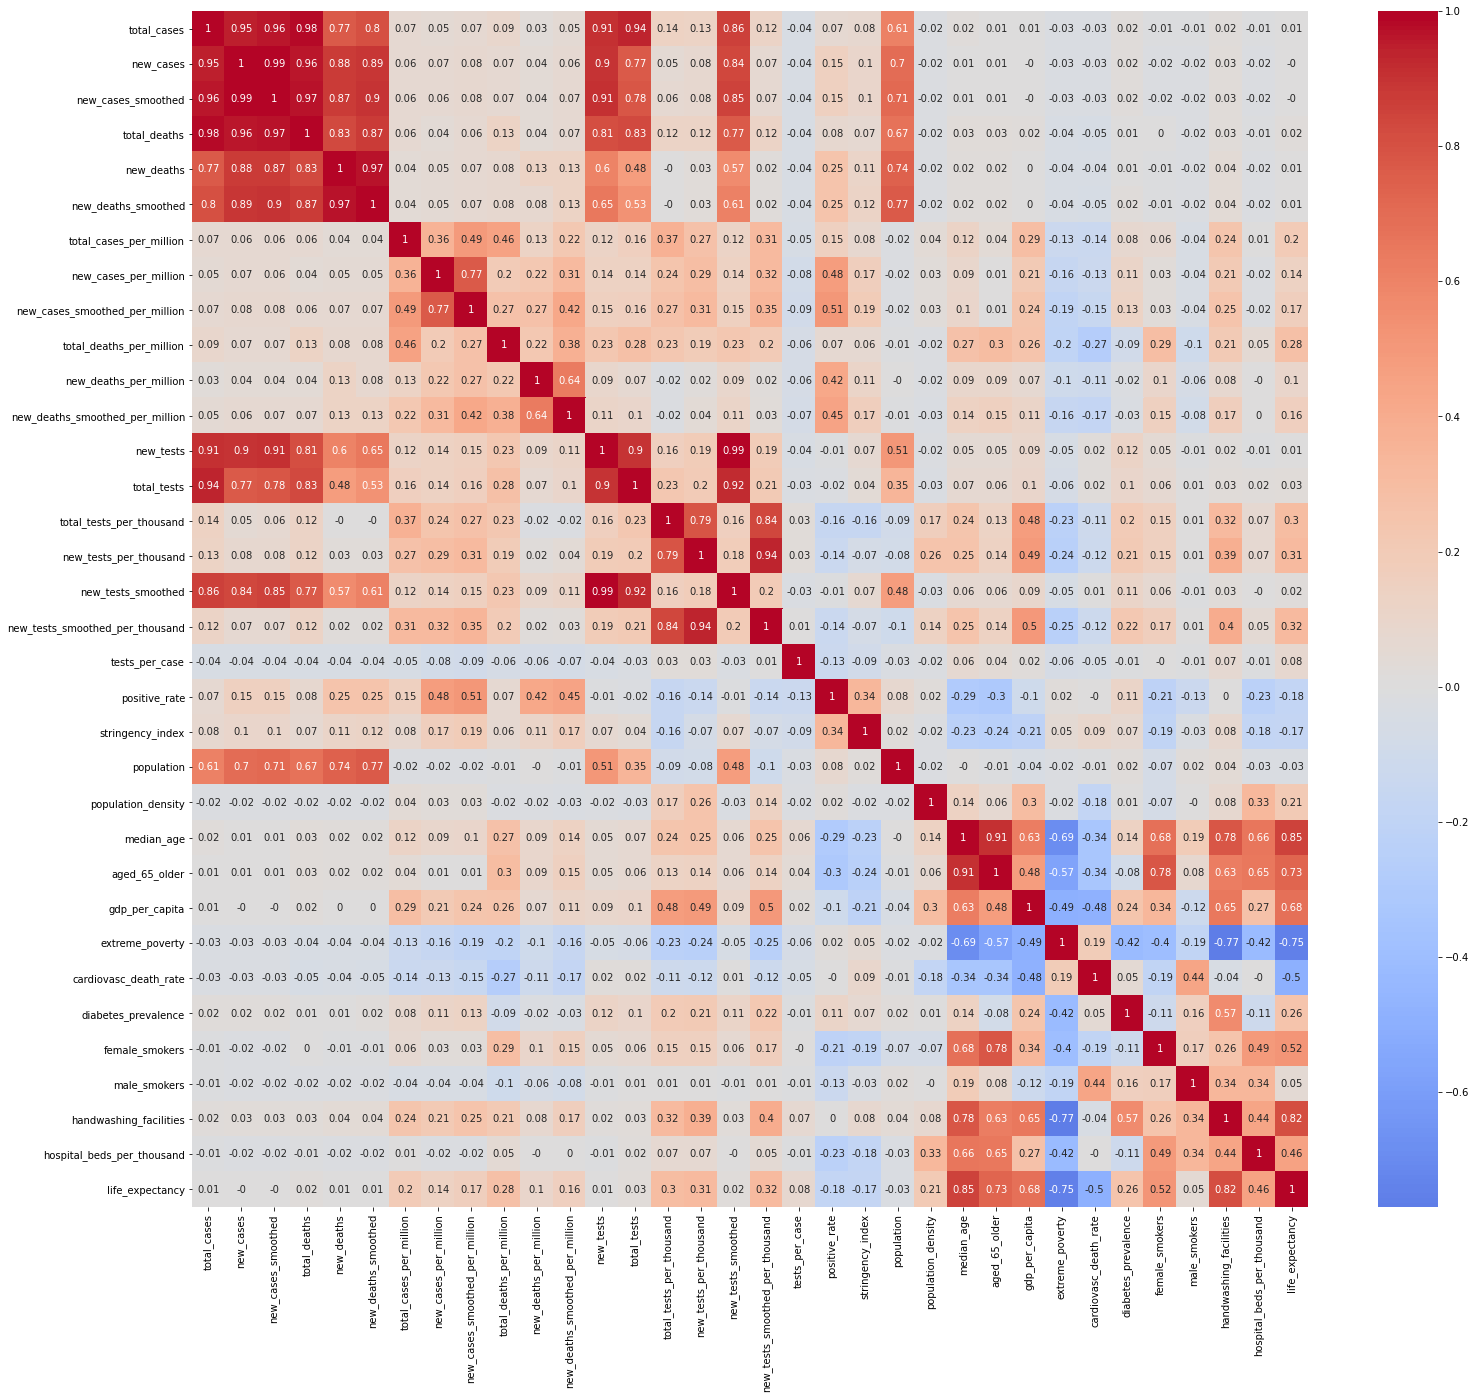

In [19]:
correlation_matrix = update_df.corr().round(2) #rounds to 2 decimal places
plt.figure(figsize=(25,22))#ask what this does
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

For the data set I didn't create a new attribute. However, I feel like I would want to make a new attribute titled "smoker". I can see how it is intersting to have a column for both male and female. Yet, it would be nice to see how smokers as a whole correlate to deaths, median age, and life expectancy.  

***
## Section: 3.4 - Implement any data cleaning steps previously identified.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [20]:
import datetime
#fixed data to take out all negative values and replace with zero
data = np.array(update_df)
print(data.shape)
for i in range(data.shape[0]):
    for j in range(39):
        if type(data[i][j]) != str and not isinstance(data[i][j], datetime.datetime):
            if float(data[i][j]) < 0:
                data[i][j] = 0;


(42649, 39)


***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? Identify and explain any interesting relationships between the class attribute and the other attributes. You may refer to earlier visualizations or create new ones.?
***

- My overall conclusion on the data is that in the real world you will more than likely work with data that isn't pretty. For the most part this data set was great to work with. There were several locations that had almost 100% of their data. Overall, the data was complete and there was a lot of correlation within the attributes.
- What I learned from the data set is that oh my lord you could honestly spend so much time with this data. I learned that I need a lot of practice with selecting data to use in my graphs. I felt that I tried to do more plots, but I wasn't able to because I didn't have a lot of practice making graphs. As stated above, the class attribute to me was very difficult to know where/how they are calculating it. Besides that, it was intereting how one could possible get rid of certain attributes to search for new correlations. Also fixing missing data can assist with fixing the data. 
